# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup # same reason as before 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create Soup, find Table and Extract 
html = browser.html
soup = soup(html, 'html.parser') # same as last time
table = soup.find('table', class_='table') #still need class_
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [5]:
# Create an empty list
# Create a list for the column names
colum_names = []
data_rows = []

# Find the column names
names = table.find_all('th')

# Loop 
for name in names:
    # Add column names 
    colum_names.append(name.text.strip())

# Print the column names
print(colum_names)


# Find the data (use the previously extracted rows of data)
for row in rows:
    # Create a list 
    data = []
    # store all cells 
    for cell in row.find_all('td'):
        data.append(cell.text.strip())
    # Add data 
    data_rows.append(data)

# Print the rows
print(data_rows)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
[[], ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0

In [6]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data_rows).dropna()
mars_weather_df.columns = colum_names
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [7]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [8]:
# Change data types for data analysis
mars_weather_df[['id', 'sol', 'ls', 'month']] = mars_weather_df[['id', 'sol', 'ls', 'month']].astype(int)
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df[['min_temp', 'pressure']] = mars_weather_df[['min_temp', 'pressure']].astype(float)

In [9]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [10]:
# 1. How many months are there on Mars?
month_count = mars_weather_df['month'].nunique()
print(f'There are {month_count} months on Mars')

There are 12 months on Mars


In [11]:
# 2. How many Martian days' worth of data are there?
day_count = mars_weather_df['sol'].nunique()
print(f'There are {day_count} Martian days worth of data in the table')

There are 1867 Martian days worth of data in the table


In [12]:
# 3. What is the average low temperature by month?
avg_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()
print(f'The average temperature by month is: \n{avg_min_temp}')

The average temperature by month is: 
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


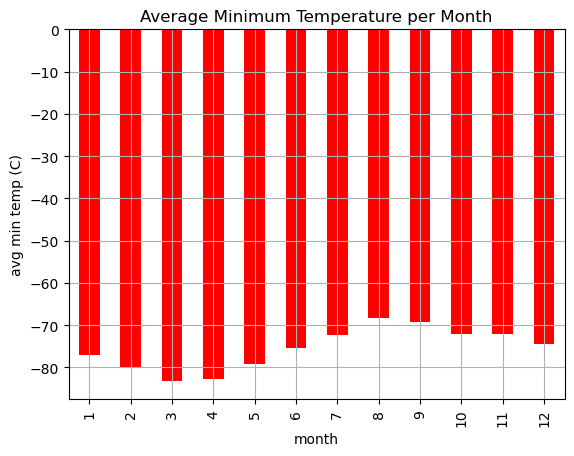

In [13]:
# Plot the average temperature by month
avg_min_temp.plot.bar(x=avg_min_temp.index, y=avg_min_temp.values, color='red', grid=True,
                      xlabel='month', ylabel='avg min temp (C)', title='Average Minimum Temperature per Month')
plt.show()

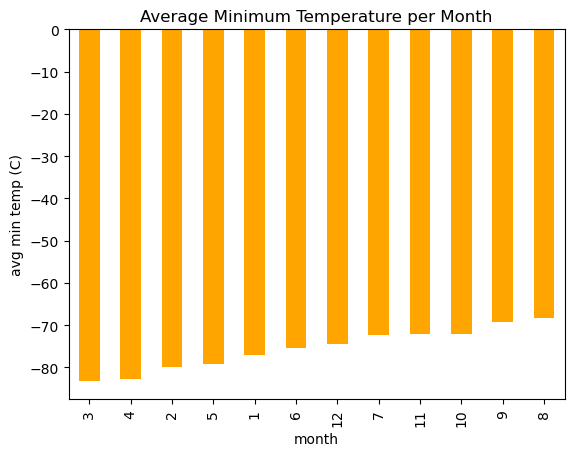

Coldest Month: 3 
Hottest Month: 8


<Figure size 640x480 with 0 Axes>

In [14]:
# Identify the coldest and hottest months in Curiosity's location
avg_min_temp = avg_min_temp.sort_values()

avg_min_temp.plot.bar(x=avg_min_temp.index, y=avg_min_temp.values, color='orange',
                      xlabel='month', ylabel='avg min temp (C)', title='Average Minimum Temperature per Month')
plt.show()

print(f'Coldest Month: {avg_min_temp.index[0]} \nHottest Month: {avg_min_temp.index[11]}')
plt.savefig('avg_min_temp.png')

In [15]:
# 4. Average pressure by Martian month
avg_pressure = mars_weather_df.groupby('month')['pressure'].mean()
print(f'The average pressure by month is: \n{avg_pressure}')

The average pressure by month is: 
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


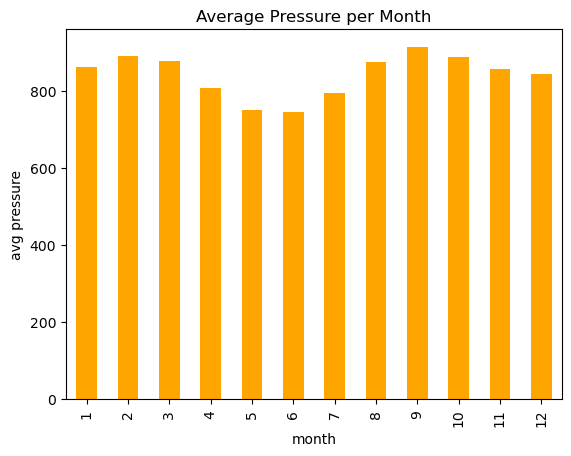

In [16]:
# Plot the average pressure by month
avg_pressure.plot.bar(x=avg_pressure.index, y=avg_pressure.values, color='orange',
                      xlabel='month', ylabel='avg pressure', title='Average Pressure per Month')
plt.show()

Lowest Average Pressure Month: 6 
Highest Average Pressure Month: 9


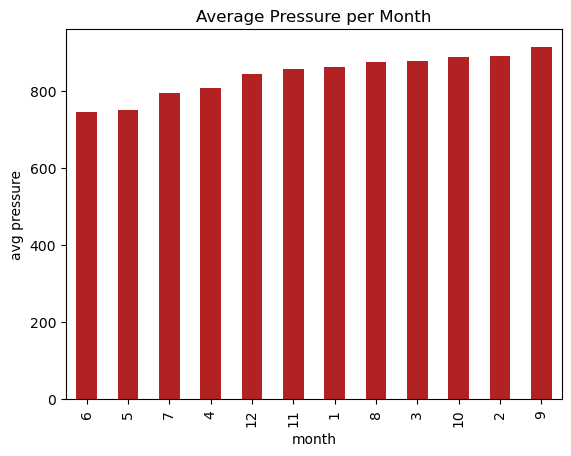

In [17]:
# answers more questions
avg_pressure = avg_pressure.sort_values()
# Plot the values to obtain the months with the highest and lowest pressure average
avg_pressure.plot.bar(x=avg_pressure.index, y=avg_pressure.values, color ='firebrick', 
                      xlabel = 'month', ylabel = 'avg pressure',
                      title = 'Average Pressure per Month')
# Display the result
print(f'Lowest Average Pressure Month: {avg_pressure.index[0]} \nHighest Average Pressure Month: {avg_pressure.index[11]}')

# Save the plot as a image file
plt.savefig('avg_pressure.png')

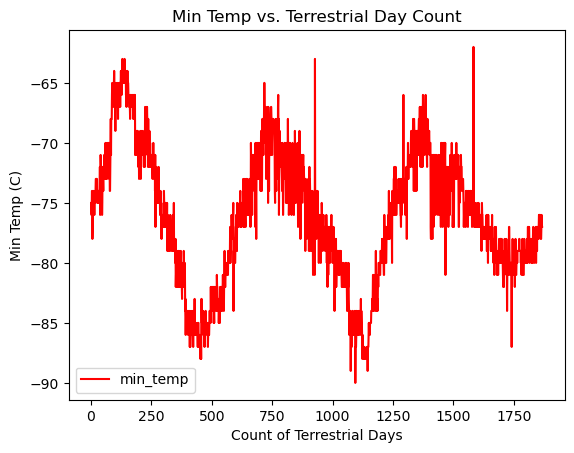

There is a peak around 690-740 and another peak around 1375-1425. 
Therefore, one Martian year is around 685 terrestial days in this plot


<Figure size 640x480 with 0 Axes>

In [18]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_weather_df = mars_weather_df.reset_index()
# Create a plot that looks at min_temp and the count of terrestial_date (the day count is in the index)
mars_weather_df.plot.line(x='index', y='min_temp', color='red',
                          title='Min Temp vs. Terrestrial Day Count').set(
                              xlabel='Count of Terrestrial Days', 
                              ylabel='Min Temp (C)')
plt.show()
# Display the results
print(f'There is a peak around 690-740 and another peak around 1375-1425. \nTherefore, one Martian year is around 685 terrestial days in this plot')

# Save the plot as a image file
plt.savefig('min_temp_day_count.png')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [19]:
# Write the data to a CSV
mars_weather_df.to_csv("mars_weather_data.csv", index=False)

In [20]:
browser.quit()